<a href="https://colab.research.google.com/github/farrelakhdan/Kelompok4_UAS_Pembelajaran_Mesin/blob/main/JS15_UAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PENGAMBILAN DATA

In [ ]:

!git clone --depth=1 https://github.com/twintproject/twint.git
!cd /content/twint && pip3 install . -r requirements.txt
!pip install aiohttp==3.7.0
!pip install nest_asyncio

Cloning into 'twint'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 47 (delta 3), reused 14 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/twint
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 265 kB 32.6 MB/s 
     |████████████████████████████████| 385 kB 57.1 MB/s 
     |████████████████████████████████| 50 kB 6.6 MB/s 
     |████████████████████████████████| 288 kB 

In [ ]:

import twint
import nest_asyncio
nest_asyncio.apply()
import time
import pandas as pd
import os
import re
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

timestr = time.strftime("%Y%m%d")
#configuration
c = twint.Config()
c.Since = "2022-12-21"
c.Until = "2022-12-26"   
c.Limit = 5000    
c.Username = "collegemenfess"   
c.Lang = "en"        # Language
c.Store_csv = True
c.Output = timestr + "_user.csv"
twint.run.Search(c)

1607163989674590209 2022-12-25 23:58:49 +0000 <collegemenfess> [cm] dimana tempat kalian berkeluh kesah soal kehidupan kampus, atau tempat curhat terdebest kalian buat ngeluhin perkuliahan?
1607163313649246208 2022-12-25 23:56:08 +0000 <collegemenfess> [cm] temen2 pernah gini gak? tiba tiba muncul something was wrong with your history chat bla bla bla terus chatnya ilang semuaa mana banyak chat grup kelas link gdrive ilang semuaa gimana biar bisa balik yaa😭😭😭  https://t.co/M6loc3TeeA
1607162707584876544 2022-12-25 23:53:43 +0000 <collegemenfess> [cm] guys, ada yang mau bantu like tugasku gak di instagram? atau kalo mau barter like juga boleh bangettt, langsung like/rep aja yaa, nanti linknya aku kirim, makasih 😻
1607162057639755777 2022-12-25 23:51:08 +0000 <collegemenfess> [cm] kampus swasta tuh lg libir nataru ga sih?
1607161879671222272 2022-12-25 23:50:26 +0000 <collegemenfess> [cm] cara chat dosbim buat follow up masalah bab1 gimana? mau nanya perihal bab1 yg blm ada jwbn dari har

In [ ]:
df = pd.read_csv('20221227_user.csv')
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1607163989674590209,1607163989674590209,2022-12-25 23:58:49 UTC,2022-12-25,23:58:49,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1607163313649246208,1607163313649246208,2022-12-25 23:56:08 UTC,2022-12-25,23:56:08,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1607162707584876544,1607162707584876544,2022-12-25 23:53:43 UTC,2022-12-25,23:53:43,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1607162057639755777,1607162057639755777,2022-12-25 23:51:08 UTC,2022-12-25,23:51:08,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1607161879671222272,1607161879671222272,2022-12-25 23:50:26 UTC,2022-12-25,23:50:26,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


PREPOCESSING DATA TWITER


In [ ]:
df.isnull()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,True,True
4996,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,True,True
4997,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,True,True
4998,False,False,False,False,False,False,False,False,False,True,...,True,True,True,True,True,False,True,True,True,True


In [ ]:
df.sum()

<ipython-input-5-760242dbb468>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum()


id                                               6600878921708794102
conversation_id                                  6600739890621669747
created_at         2022-12-25 23:58:49 UTC2022-12-25 23:56:08 UTC...
date               2022-12-252022-12-252022-12-252022-12-252022-1...
time               23:58:4923:56:0823:53:4323:51:0823:50:2623:49:...
timezone                                                           0
user_id                                         -8455273219505618944
username           collegemenfesscollegemenfesscollegemenfesscoll...
name               COLLE | CEK PINNED😎COLLE | CEK PINNED😎COLLE | ...
place                                                            0.0
tweet              [cm] dimana tempat kalian berkeluh kesah soal ...
language           ininininininininininininininininininininininin...
mentions           [][][][][][][][][][][][][][][][][][][][][][][]...
urls               [][][][][][][][][][][][][][][][][][][][][][][]...
photos             []['https://pbs

In [ ]:
df = df.drop(df.iloc[:,1:10], axis=1)
df = df.drop(df.iloc[:,2:], axis=1)
df.head()

,id,tweet
0,1607163989674590209,[cm] dimana tempat kalian berkeluh kesah soal ...
1,1607163313649246208,[cm] temen2 pernah gini gak? tiba tiba muncul ...
2,1607162707584876544,"[cm] guys, ada yang mau bantu like tugasku gak..."
3,1607162057639755777,[cm] kampus swasta tuh lg libir nataru ga sih?
4,1607161879671222272,[cm] cara chat dosbim buat follow up masalah b...


In [ ]:
def clean_lower(lwr):
    lwr = lwr.lower()
    return lwr


In [ ]:
clean_spcl = re.compile('[/(){}\[\]\|@,;][c][m]')
clean_symbol = re.compile('[^0-9a-z]')
def clean_punct(text):
    text = clean_spcl.sub('', text)
    text = clean_symbol.sub(' ', text)
    return text

In [ ]:
def _normalize_whitespace(text):
    corrected = str(text)
    corrected = re.sub(r"//t",r"\t", corrected)
    corrected = re.sub(r"( )\1+",r"\1", corrected)
    corrected = re.sub(r"(\n)\1+",r"\1", corrected)
    corrected = re.sub(r"(\r)\1+",r"\1", corrected)
    corrected = re.sub(r"(\t)\1+",r"\1", corrected)
    return corrected.strip(" ")

In [ ]:
df['hasil_tweet'] = df['tweet'].apply(clean_lower).apply(clean_punct).apply(_normalize_whitespace)

df.head()

,id,tweet,hasil_tweet
0,1607163989674590209,[cm] dimana tempat kalian berkeluh kesah soal ...,dimana tempat kalian berkeluh kesah soal kehid...
1,1607163313649246208,[cm] temen2 pernah gini gak? tiba tiba muncul ...,temen2 pernah gini gak tiba tiba muncul someth...
2,1607162707584876544,"[cm] guys, ada yang mau bantu like tugasku gak...",guys ada yang mau bantu like tugasku gak di in...
3,1607162057639755777,[cm] kampus swasta tuh lg libir nataru ga sih?,kampus swasta tuh lg libir nataru ga sih
4,1607161879671222272,[cm] cara chat dosbim buat follow up masalah b...,cara chat dosbim buat follow up masalah bab1 g...


CLUSTERING DATA TWITTER


In [ ]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


def getPolarity(text):
    return TextBlob(text).sentiment.polarity


df['Subjectivity'] = df['hasil_tweet'].apply(getSubjectivity)
df['Polarity'] = df['hasil_tweet'].apply(getPolarity)


df.head()

,id,tweet,hasil_tweet,Subjectivity,Polarity
0,1607163989674590209,[cm] dimana tempat kalian berkeluh kesah soal ...,dimana tempat kalian berkeluh kesah soal kehid...,0.0,0.0
1,1607163313649246208,[cm] temen2 pernah gini gak? tiba tiba muncul ...,temen2 pernah gini gak tiba tiba muncul someth...,0.9,-0.5
2,1607162707584876544,"[cm] guys, ada yang mau bantu like tugasku gak...",guys ada yang mau bantu like tugasku gak di in...,0.0,0.0
3,1607162057639755777,[cm] kampus swasta tuh lg libir nataru ga sih?,kampus swasta tuh lg libir nataru ga sih,0.0,0.0
4,1607161879671222272,[cm] cara chat dosbim buat follow up masalah b...,cara chat dosbim buat follow up masalah bab1 g...,0.0,0.0


<function matplotlib.pyplot.show(*args, **kw)>

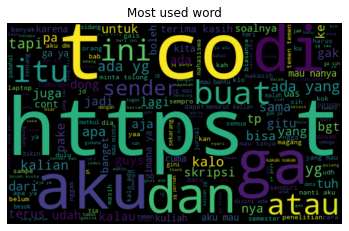

In [ ]:
allWords = ' '.join([twts for twts in df['hasil_tweet']])
wordCloud = WordCloud(width = 500, height = 300,random_state = 21, max_font_size = 120).generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear");
plt.title('Most used word')
plt.axis('off')
plt.show

In [ ]:
def getSentiment(score):
    if score < 0 :
        return 'Negative'
    elif score == 0 :
        return 'Netral'
    else :
        return 'Positive'
 
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head()

,id,tweet,hasil_tweet,Subjectivity,Polarity,Sentiment
0,1607163989674590209,[cm] dimana tempat kalian berkeluh kesah soal ...,dimana tempat kalian berkeluh kesah soal kehid...,0.0,0.0,Netral
1,1607163313649246208,[cm] temen2 pernah gini gak? tiba tiba muncul ...,temen2 pernah gini gak tiba tiba muncul someth...,0.9,-0.5,Negative
2,1607162707584876544,"[cm] guys, ada yang mau bantu like tugasku gak...",guys ada yang mau bantu like tugasku gak di in...,0.0,0.0,Netral
3,1607162057639755777,[cm] kampus swasta tuh lg libir nataru ga sih?,kampus swasta tuh lg libir nataru ga sih,0.0,0.0,Netral
4,1607161879671222272,[cm] cara chat dosbim buat follow up masalah b...,cara chat dosbim buat follow up masalah bab1 g...,0.0,0.0,Netral


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


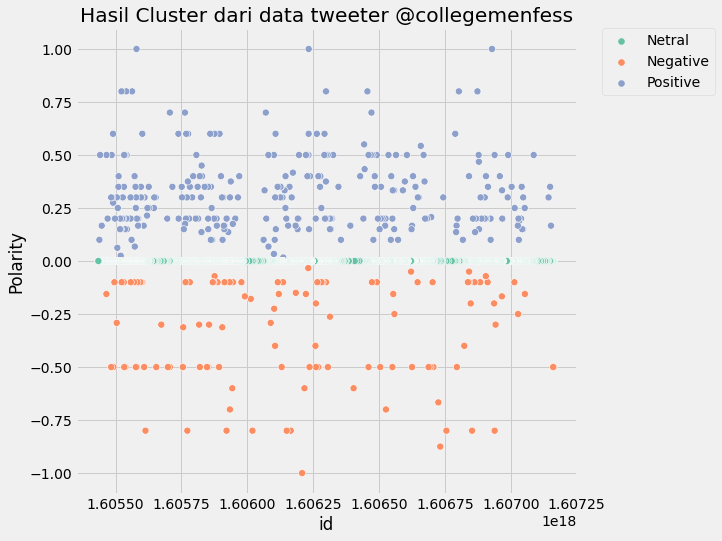

In [ ]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(8, 8))

scat = sns.scatterplot(
   df['id'],
    df['Polarity'],
    s=50,
    data=df,
    hue=df['Sentiment'],
    palette="Set2",
)

scat.set_title(
    "Hasil Cluster dari data tweeter @collegemenfess"
 )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

plt.show()

LABELING DATA TWITTER


In [ ]:
df = pd.DataFrame({
    'id': df['id'],
    'hasil_tweet' : df['hasil_tweet'],
    'Sentiment' : df['Sentiment']
})
df.head()

,id,hasil_tweet,Sentiment
0,1607163989674590209,dimana tempat kalian berkeluh kesah soal kehid...,Netral
1,1607163313649246208,temen2 pernah gini gak tiba tiba muncul someth...,Negative
2,1607162707584876544,guys ada yang mau bantu like tugasku gak di in...,Netral
3,1607162057639755777,kampus swasta tuh lg libir nataru ga sih,Netral
4,1607161879671222272,cara chat dosbim buat follow up masalah bab1 g...,Netral


In [ ]:
encode = LabelEncoder()
content = encode.fit_transform(df['Sentiment'])
df['Label_Sentiment']  = pd.DataFrame(content)
df.head()

,id,hasil_tweet,Sentiment,Label_Sentiment
0,1607163989674590209,dimana tempat kalian berkeluh kesah soal kehid...,Netral,1
1,1607163313649246208,temen2 pernah gini gak tiba tiba muncul someth...,Negative,0
2,1607162707584876544,guys ada yang mau bantu like tugasku gak di in...,Netral,1
3,1607162057639755777,kampus swasta tuh lg libir nataru ga sih,Netral,1
4,1607161879671222272,cara chat dosbim buat follow up masalah bab1 g...,Netral,1


KLASIFIKASI DATA TWITER

In [ ]:
X = df['hasil_tweet'].values
y = df['Label_Sentiment'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

bow = TfidfVectorizer(stop_words='english')

X_train = bow.fit_transform(X_train)

X_test = bow.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rdf_model = RandomForestClassifier().fit(X_train, y_train)

y_pred_train = rdf_model.predict(X_train)

acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = rdf_model.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_test)

print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 1.0
Hasil akurasi data test: 0.958


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.21      0.33        19
           1       0.96      1.00      0.98       934
           2       1.00      0.43      0.60        47

    accuracy                           0.96      1000
   macro avg       0.92      0.55      0.64      1000
weighted avg       0.96      0.96      0.95      1000



SNTIMEN DATA BARU TWITTER

In [ ]:
timestr = time.strftime("%Y%m%d")

c = twint.Config()
c.Since = "2022-12-19"
c.Until = "2022-12-20"    
c.Limit = 500    
c.Username = "collegemenfess"   
c.Lang = "en"        
c.Store_csv = True
c.Output = timestr + "_user_baru.csv"
twint.run.Search(c)

1604989828114051072 2022-12-19 23:59:28 +0000 <collegemenfess> [cm] iri banget liat temenku yang dospem nya bisa diajak kerja sama trs tiap bimbingan detail bgt dan peduli sama penelitian anak bimbingnya😭 guys semangatin sender karna dospemnya bikin shsksjfjwllasuruiejwbsbdhduis
1604989405382729728 2022-12-19 23:57:48 +0000 <collegemenfess> [Cm] bingung bangett pilih konsentrasi apa ya? - minat di manajemen keuangan tp harus belajar extra - kurang minat di SDM tapi aku gampang ngejalaninnya  Boleh saran?
1604988906289606657 2022-12-19 23:55:49 +0000 <collegemenfess> Kalian yg kuliah kelas malem/kelas karyawan, review dongg pertemanannya kaya gmnaaa. Suka diskusi atau ngerjain tugas bareng bareng gt juga ngga?? [cm]
1604987594282262528 2022-12-19 23:50:36 +0000 <collegemenfess> Cara nolak ngasih jawaban kita ke anak gg deket gimana ya? Aku agak nyesel dulu kasih perhatian ke dia.. cuma pas butuh dia cari aku huhuhu [cm]
1604987464057499648 2022-12-19 23:50:05 +0000 <collegemenfess> kali

In [ ]:
df = pd.read_csv('20221227_user_baru.csv')
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1604989828114051072,1604989828114051072,2022-12-19 23:59:28 UTC,2022-12-19,23:59:28,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1604989405382729728,1604989405382729728,2022-12-19 23:57:48 UTC,2022-12-19,23:57:48,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1604988906289606657,1604988906289606657,2022-12-19 23:55:49 UTC,2022-12-19,23:55:49,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1604987594282262528,1604987594282262528,2022-12-19 23:50:36 UTC,2022-12-19,23:50:36,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1604987464057499648,1604987464057499648,2022-12-19 23:50:05 UTC,2022-12-19,23:50:05,0,1046084008742801408,collegemenfess,COLLE | CEK PINNED😎,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
#DROP KOLOM yang tidak digunakan
df = df.drop(df.iloc[:,1:10], axis=1)
df = df.drop(df.iloc[:,2:], axis=1)
df.head()

,id,tweet
0,1604989828114051072,[cm] iri banget liat temenku yang dospem nya b...
1,1604989405382729728,[Cm] bingung bangett pilih konsentrasi apa ya?...
2,1604988906289606657,"Kalian yg kuliah kelas malem/kelas karyawan, r..."
3,1604987594282262528,Cara nolak ngasih jawaban kita ke anak gg deke...
4,1604987464057499648,kalian tim percaya atau ngga kalo resume kita ...


In [ ]:
df['hasil_tweet_baru'] = df['tweet'].apply(clean_lower).apply(clean_punct).apply(_normalize_whitespace)

df.head()

,id,tweet,hasil_tweet_baru
0,1604989828114051072,[cm] iri banget liat temenku yang dospem nya b...,iri banget liat temenku yang dospem nya bisa d...
1,1604989405382729728,[Cm] bingung bangett pilih konsentrasi apa ya?...,bingung bangett pilih konsentrasi apa ya minat...
2,1604988906289606657,"Kalian yg kuliah kelas malem/kelas karyawan, r...",kalian yg kuliah kelas malem kelas karyawan re...
3,1604987594282262528,Cara nolak ngasih jawaban kita ke anak gg deke...,cara nolak ngasih jawaban kita ke anak gg deke...
4,1604987464057499648,kalian tim percaya atau ngga kalo resume kita ...,kalian tim percaya atau ngga kalo resume kita ...


In [ ]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity


def getPolarity(text):
    return TextBlob(text).sentiment.polarity


df['Subjectivity'] = df['hasil_tweet_baru'].apply(getSubjectivity)
df['Polarity'] = df['hasil_tweet_baru'].apply(getPolarity)


df.head()

,id,tweet,hasil_tweet_baru,Subjectivity,Polarity
0,1604989828114051072,[cm] iri banget liat temenku yang dospem nya b...,iri banget liat temenku yang dospem nya bisa d...,0.0,0.0
1,1604989405382729728,[Cm] bingung bangett pilih konsentrasi apa ya?...,bingung bangett pilih konsentrasi apa ya minat...,0.1,0.0
2,1604988906289606657,"Kalian yg kuliah kelas malem/kelas karyawan, r...",kalian yg kuliah kelas malem kelas karyawan re...,0.0,0.0
3,1604987594282262528,Cara nolak ngasih jawaban kita ke anak gg deke...,cara nolak ngasih jawaban kita ke anak gg deke...,0.0,0.0
4,1604987464057499648,kalian tim percaya atau ngga kalo resume kita ...,kalian tim percaya atau ngga kalo resume kita ...,0.0,0.0


In [ ]:
def getSentiment(score):
    if score < 0 :
        return 'Negative'
    elif score == 0 :
        return 'Netral'
    else :
        return 'Positive'

df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head()

,id,tweet,hasil_tweet_baru,Subjectivity,Polarity,Sentiment
0,1604989828114051072,[cm] iri banget liat temenku yang dospem nya b...,iri banget liat temenku yang dospem nya bisa d...,0.0,0.0,Netral
1,1604989405382729728,[Cm] bingung bangett pilih konsentrasi apa ya?...,bingung bangett pilih konsentrasi apa ya minat...,0.1,0.0,Netral
2,1604988906289606657,"Kalian yg kuliah kelas malem/kelas karyawan, r...",kalian yg kuliah kelas malem kelas karyawan re...,0.0,0.0,Netral
3,1604987594282262528,Cara nolak ngasih jawaban kita ke anak gg deke...,cara nolak ngasih jawaban kita ke anak gg deke...,0.0,0.0,Netral
4,1604987464057499648,kalian tim percaya atau ngga kalo resume kita ...,kalian tim percaya atau ngga kalo resume kita ...,0.0,0.0,Netral


In [ ]:
encode = LabelEncoder()
content = encode.fit_transform(df['Sentiment'])
df['Label_Sentiment']  = pd.DataFrame(content)
df.head()

,id,tweet,hasil_tweet_baru,Subjectivity,Polarity,Sentiment,Label_Sentiment
0,1604989828114051072,[cm] iri banget liat temenku yang dospem nya b...,iri banget liat temenku yang dospem nya bisa d...,0.0,0.0,Netral,1
1,1604989405382729728,[Cm] bingung bangett pilih konsentrasi apa ya?...,bingung bangett pilih konsentrasi apa ya minat...,0.1,0.0,Netral,1
2,1604988906289606657,"Kalian yg kuliah kelas malem/kelas karyawan, r...",kalian yg kuliah kelas malem kelas karyawan re...,0.0,0.0,Netral,1
3,1604987594282262528,Cara nolak ngasih jawaban kita ke anak gg deke...,cara nolak ngasih jawaban kita ke anak gg deke...,0.0,0.0,Netral,1
4,1604987464057499648,kalian tim percaya atau ngga kalo resume kita ...,kalian tim percaya atau ngga kalo resume kita ...,0.0,0.0,Netral,1


In [ ]:
X = df['hasil_tweet_baru'].values
y = df['Label_Sentiment'].values

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

bow = TfidfVectorizer(stop_words='english')

X_train = bow.fit_transform(X_train)

X_test = bow.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rdf_model = RandomForestClassifier().fit(X_train, y_train)

y_pred_train = rdf_model.predict(X_train)

acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = rdf_model.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_test)

print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 1.0
Hasil akurasi data test: 0.89


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.89      1.00      0.94        88
           2       1.00      0.10      0.18        10

    accuracy                           0.89       100
   macro avg       0.63      0.37      0.37       100
weighted avg       0.88      0.89      0.85       100



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
